<a href="https://colab.research.google.com/github/hsm16c/BooksLibrary/blob/master/Gradiant_descent2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Partie 1 **

In [ ]:
#partie1::fonction1 MSE
def mean_squared_error(b, x, y):
    y_predicted = np.dot(x, b)
    return np.sum((y_predicted - y) ** 2) / len(y)

#partie1 :: fonction2  LOG_LOSS
def logistic_regression(b, x, y):
    y_predicted = 1 / (1 + np.exp(-np.dot(x, b)))
    return -np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted)) / len(y)

#partie1 :: fonction3  mean_squared_error_gradient
def mean_squared_error_gradient(b, x, y):
    y_predicted = np.dot(x, b)
    return (2 / len(y)) * np.dot(x.T, (y_predicted - y))

#partie1 :: fonction4  logistic_regression_gradient
def logistic_regression_gradient(b, x, y):
    y_predicted = 1 / (1 + np.exp(-np.dot(x, b)))
    return np.dot(x.T, (y_predicted - y)) / len(y)

#partie1 :: fonction5 pour check_fonctions tester les fonctions precedentes
def check_fonctions():
    np.random.seed(0)
    # Generate random data for datax and datay
    datax = np.random.randn(1000, 2)
    datay = np.random.choice([-1, 1], size=(1000, 1))
    b_random = np.random.randn(datax.shape[1], 1)

    mse_value = mean_squared_error(b_random, datax, datay)
    assert(np.isclose(mse_value, 1.59701, rtol=1e-4))

    lr_value = logistic_regression(b_random, datax, datay)
    assert(np.isclose(lr_value, 0.75698, rtol=1e-4))

    mse_grad_value = mean_squared_error_gradient(b_random, datax, datay)
    assert(np.isclose(mse_grad_value.mean(), 0.70793, rtol=1e-4))

    lr_grad_value = logistic_regression_gradient(b_random, datax, datay)
    assert(np.isclose(lr_grad_value.mean(), 0.07050, rtol=1e-4))

    np.random.seed(0)

#partie1 :: fonction5 pour gradient_check tester le gradiant descent
def gradient_check(fn, fn_grad, N=100):
    datax = np.random.randn(N, 2)
    datay = np.random.choice([-1, 1], size=(N, 1))
    beta = np.random.randn(datax.shape[1], 1)

    epsilon = 1e-7
    rtol = 1e-5


    grad_analytique = fn_grad(datax, datay, beta)
    grad_numerique = np.zeros_like(beta)

    for i in range(len(beta)):
        e = np.zeros_like(beta)
        e[i] = epsilon


        f_plus = fn(datax, datay, beta + e)
        f_minus = fn(datax, datay, beta - e)

        grad_numerique[i] = (f_plus - f_minus) / (2 * epsilon)

    is_close = np.isclose(grad_analytique, grad_numerique, rtol=rtol)
    all_close = np.all(is_close)

    print("Résultats de la vérification du gradient :")
    print(f"Gradient analytique :\n{grad_analytique}")
    print(f"Gradient numérique :\n{grad_numerique}")
    print(f"Différence relative maximale : {np.max(np.abs(grad_analytique - grad_numerique))}")
    print(f"Vérification {'réussie' if all_close else 'échouée'}")

    return all_close

# **Partie 2**

In [ ]:
#====================================================================================================
#partie2 :: fonction1 gradient_descent
def gradiant_descent(datax,datay,fn_loss,fn_grad,eps,num_iterations):
    b = 0
    b_values = [b]
    loss_values = []

    for i in range(num_iterations):
        loss = fn_loss(datax, datay, b)
        grad = fn_grad(datax, datay, b)

        b = b - eps * grad

        b_values.append(b)
        loss_values.append(loss)

    return b, b_values, loss_values

# **Partie 3**

In [ ]:
#====================================================================================================
#partie3 :: fonction1 generate_artificial_data
def generate_artificial_data(num_samples=1000, data_type=0, epsilon=0.02):
    # Define the centers and covariance matrix
    centerx, centery = 1, 1
    sigma = np.array([[0.1, 0], [0, 0.1]])

    # Initialize data arrays
    datax = []
    datay = []

    if data_type == 0:
        # Data type 0: Mixture of 2 Gaussians
        x_pos = np.random.multivariate_normal([centerx, centery], sigma, num_samples // 2)
        x_neg = np.random.multivariate_normal([-centerx, -centery], sigma, num_samples // 2)
        datax = np.vstack((x_pos, x_neg))
        datay = np.hstack((np.ones(num_samples // 2), -np.ones(num_samples // 2)))

    elif data_type == 1:
        # Data type 1: Mixture of 4 Gaussians
        x_pos1 = np.random.multivariate_normal([centerx, centery], sigma, num_samples // 4)
        x_pos2 = np.random.multivariate_normal([-centerx, centery], sigma, num_samples // 4)
        x_neg1 = np.random.multivariate_normal([centerx, -centery], sigma, num_samples // 4)
        x_neg2 = np.random.multivariate_normal([-centerx, -centery], sigma, num_samples // 4)
        datax = np.vstack((x_pos1, x_pos2, x_neg1, x_neg2))
        datay = np.hstack((np.ones(num_samples // 2), -np.ones(num_samples // 2)))

    elif data_type == 2:
        # Data type 2: Checkerboard pattern
        datax = np.random.uniform(-4, 4, (num_samples, 2))
        datay = 2 * ((np.floor(datax[:, 0]) + np.floor(datax[:, 1])) % 2) - 1

    # Add Gaussian noise
    noise = np.random.normal(0, epsilon, datax.shape)
    datax += noise

    # Shuffle the data
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    datax = datax[indices]
    datay = datay[indices]

    # Reshape labels
    datay = datay.reshape(-1, 1)

    return datax, datay


#partie3 :: fonction2 plot_2d_data
def plot_2d_data(data, labels=None):

    plt.figure(figsize=(8, 6))

    if labels is None:
        plt.scatter(data[:, 0], data[:, 1], c='b', marker='o', label='Data Points')
    else:
        unique_labels = np.unique(labels)
        for label in unique_labels:
            plt.scatter(data[labels.flatten() == label, 0],
                        data[labels.flatten() == label, 1],
                        label=f'Class {int(label)}')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("2D Data Visualization")
    plt.legend()
    plt.show()


def create_2d_grid(data=None, xmin=-2, xmax=2, ymin=-2, ymax=2, step=20):
    if data is not None:
        # Add padding to the boundaries
        padding = 0.5
        xmin, xmax = np.min(data[:, 0]) - padding, np.max(data[:, 0]) + padding
        ymin, ymax = np.min(data[:, 1]) - padding, np.max(data[:, 1]) + padding

    x = np.linspace(xmin, xmax, step)
    y = np.linspace(ymin, ymax, step)
    xx, yy = np.meshgrid(x, y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    return grid, xx, yy

def circular_decision_function(grid):
    """Circular decision function f(grid) = sgn(√(x² + y²) - 1)"""
    x, y = grid[:, 0], grid[:, 1]
    return np.sign(np.sqrt(x**2 + y**2) - 1)

def linear_decision_function(grid):
    """Linear decision function f(grid) = sgn(x - y)"""
    x, y = grid[:, 0], grid[:, 1]
    return np.sign(x - y)

def plot_decision_boundary(data, fn, step=20):
    # Create grid
    grid, xx, yy = create_2d_grid(data=data, step=step)

    # Apply decision function to grid points
    zz = fn(grid)
    zz = zz.reshape(xx.shape)

    plt.figure(figsize=(10, 8))

    # Plot decision boundary
    plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red'])

    # Plot data points
    if data is not None:
        plt.scatter(data[:, 0], data[:, 1], c='black', marker='o', label='Data Points')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.colorbar(label='Class')
    plt.show()


Visualizing data for data_type = 0


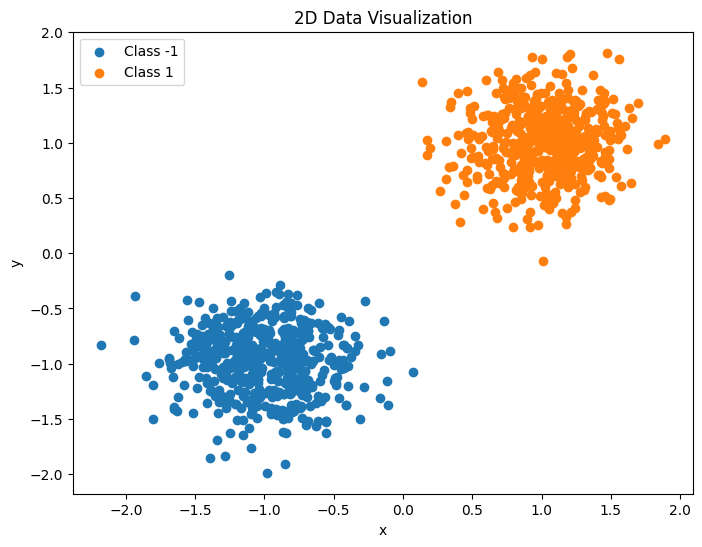

Visualizing data for data_type = 1


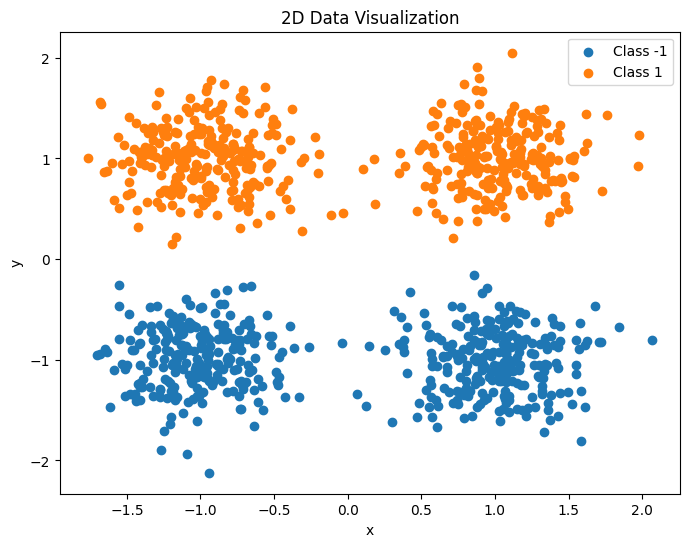

Visualizing data for data_type = 2


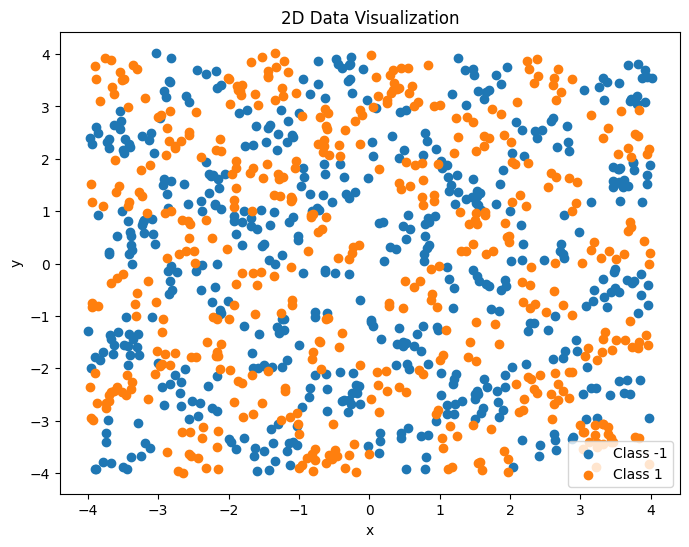

In [ ]:
# Test and visualize generate_artificial_data and plot_2d_data for each data_type
for data_type in [0, 1, 2]:
    datax, datay = generate_artificial_data(num_samples=1000, data_type=data_type, epsilon=0.02)
    print(f"Visualizing data for data_type = {data_type}")
    plot_2d_data(datax, datay)

Visualizing decision boundary with random weight vector β


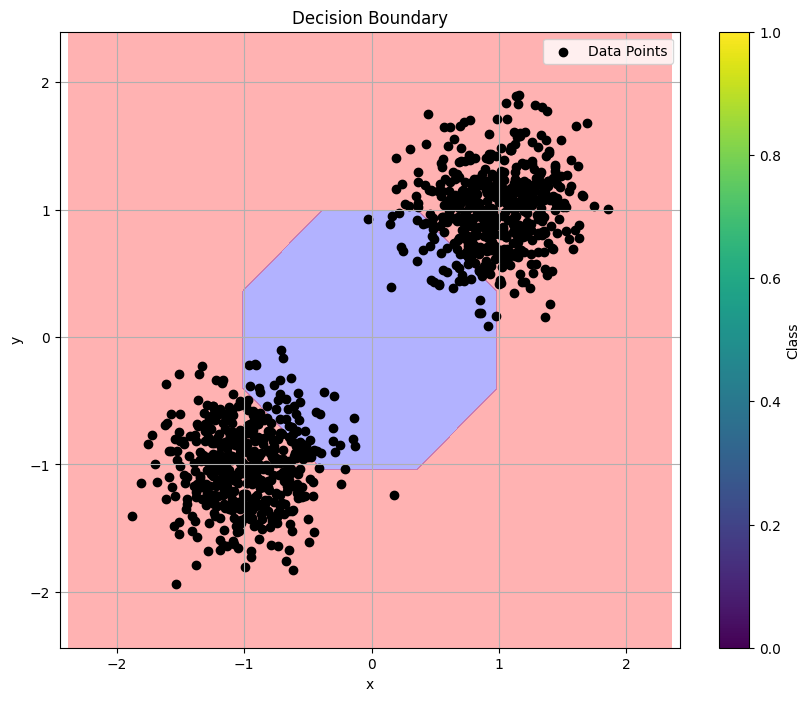

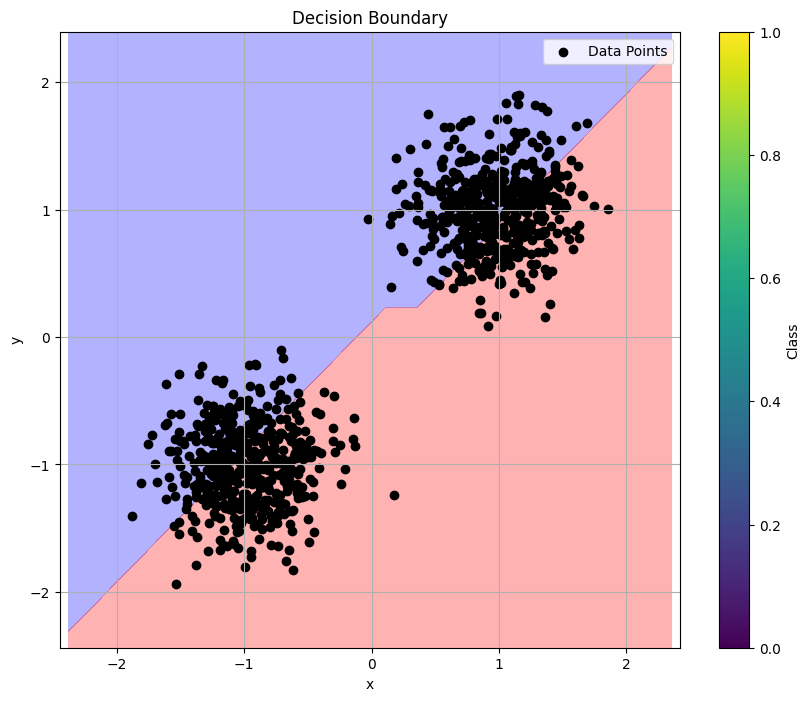

Visualizing decision boundary with random weight vector β


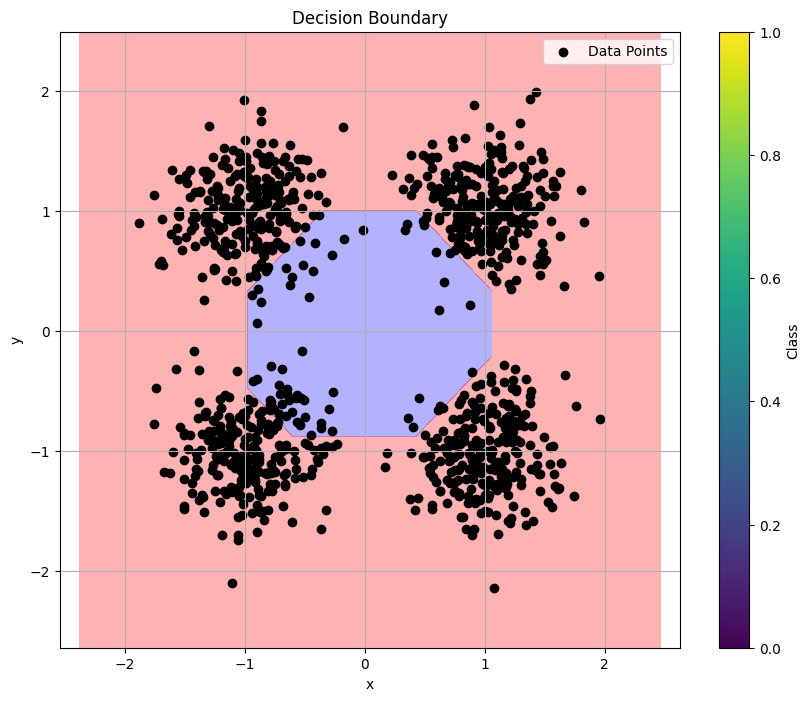

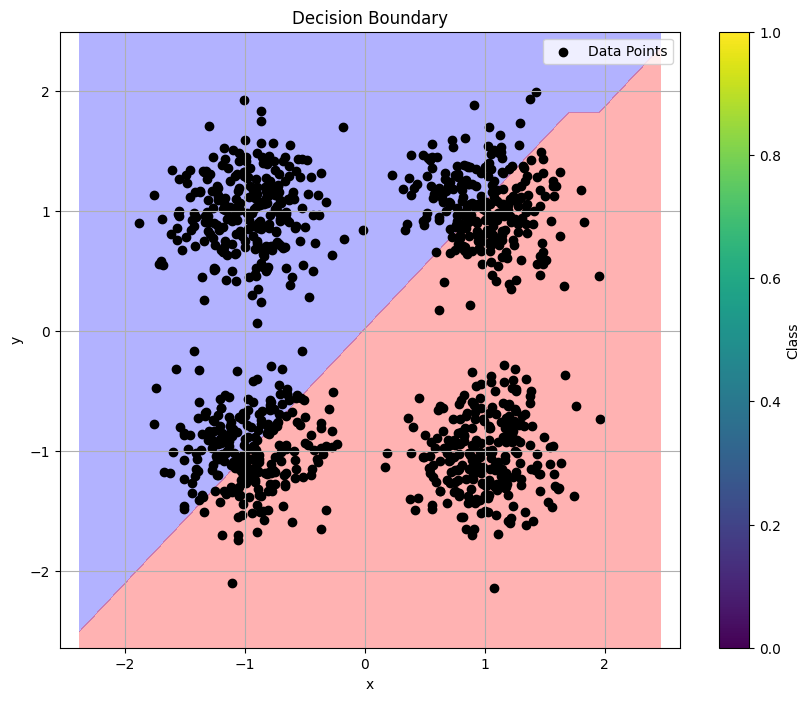

Visualizing decision boundary with random weight vector β


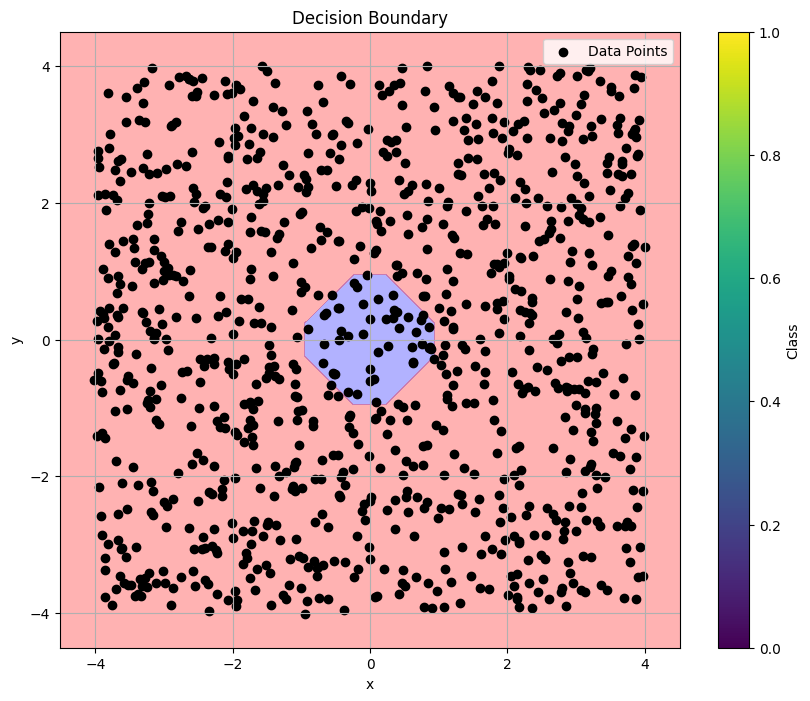

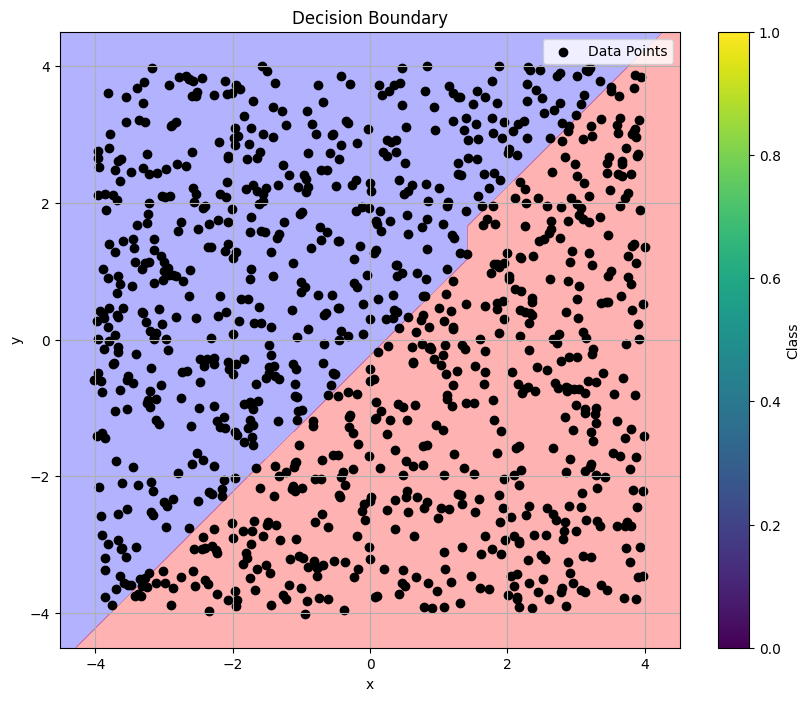

In [ ]:
for data_type in [0, 1, 2]:
    datax, datay = generate_artificial_data(num_samples=1000, data_type=data_type, epsilon=0.02)
    beta = np.random.randn(2)
    fn = lambda grid: np.sign(np.dot(grid, beta))
    print(f"Visualizing decision boundary with random weight vector β")
    # For circular decision boundary
    plot_decision_boundary(datax, circular_decision_function, step=20)
    # For linear decision boundary
    plot_decision_boundary(datax, linear_decision_function, step=20)

Visualizing decision boundary with random weight vector β


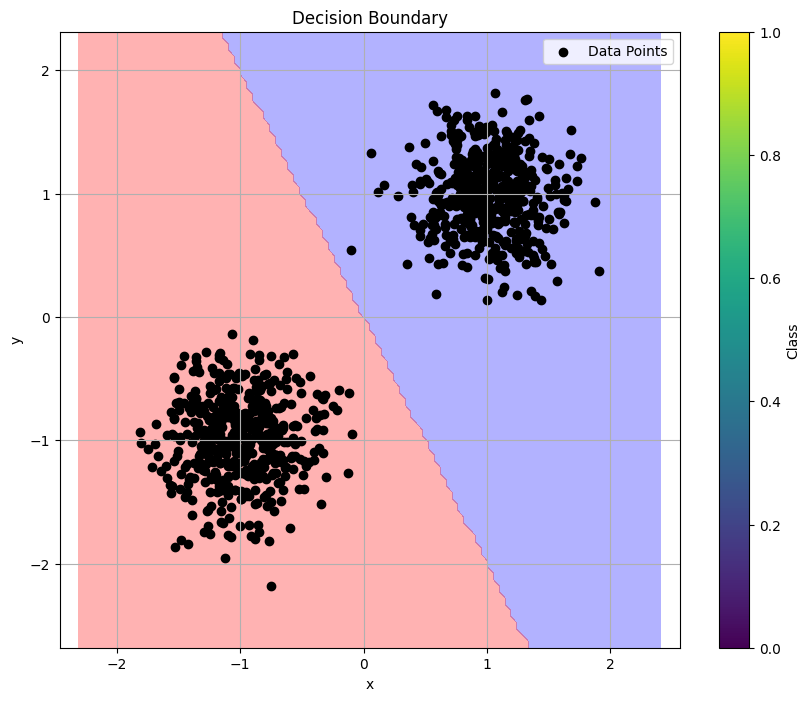

Visualizing decision boundary with random weight vector β


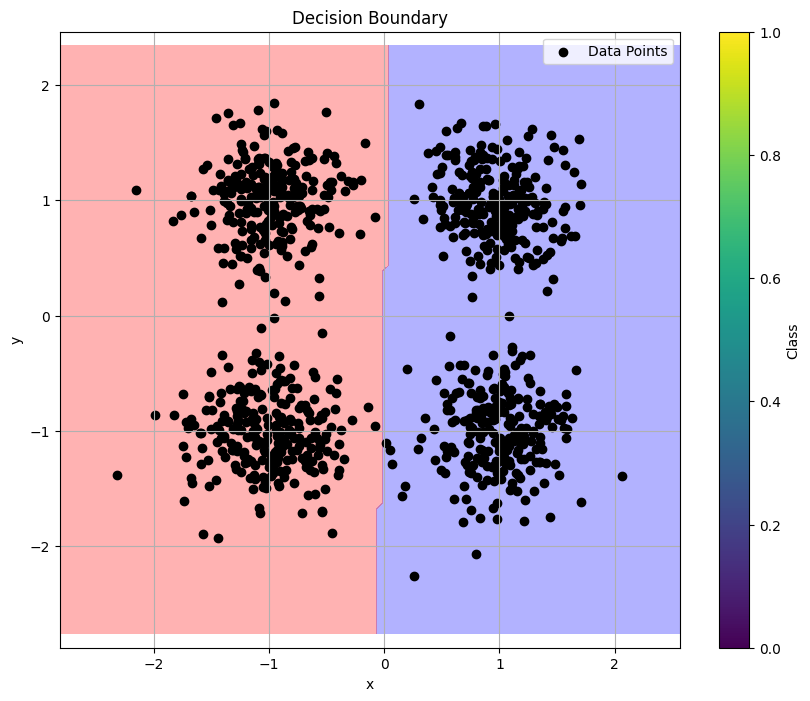

Visualizing decision boundary with random weight vector β


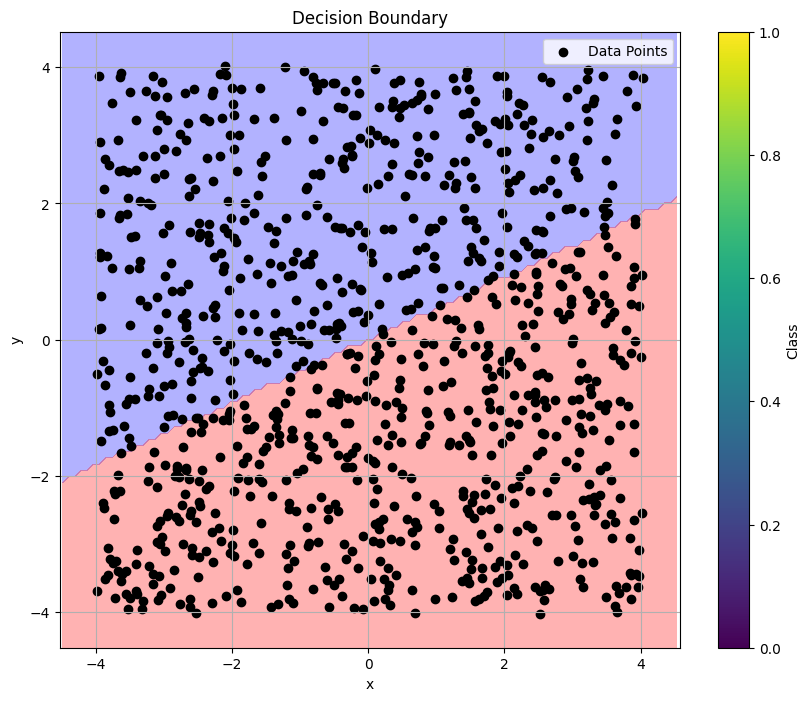

In [ ]:
# Test and visualize generate_artificial_data and plot_2d_data for each data_type
for data_type in [0, 1, 2]:
    datax, datay = generate_artificial_data(num_samples=1000, data_type=data_type, epsilon=0.02)
    beta = np.random.randn(2)
    fn = lambda grid: np.sign(np.dot(grid, beta))
    print(f"Visualizing decision boundary with random weight vector β")
    plot_decision_boundary(datax, fn, step=100)

#**Partie 4**

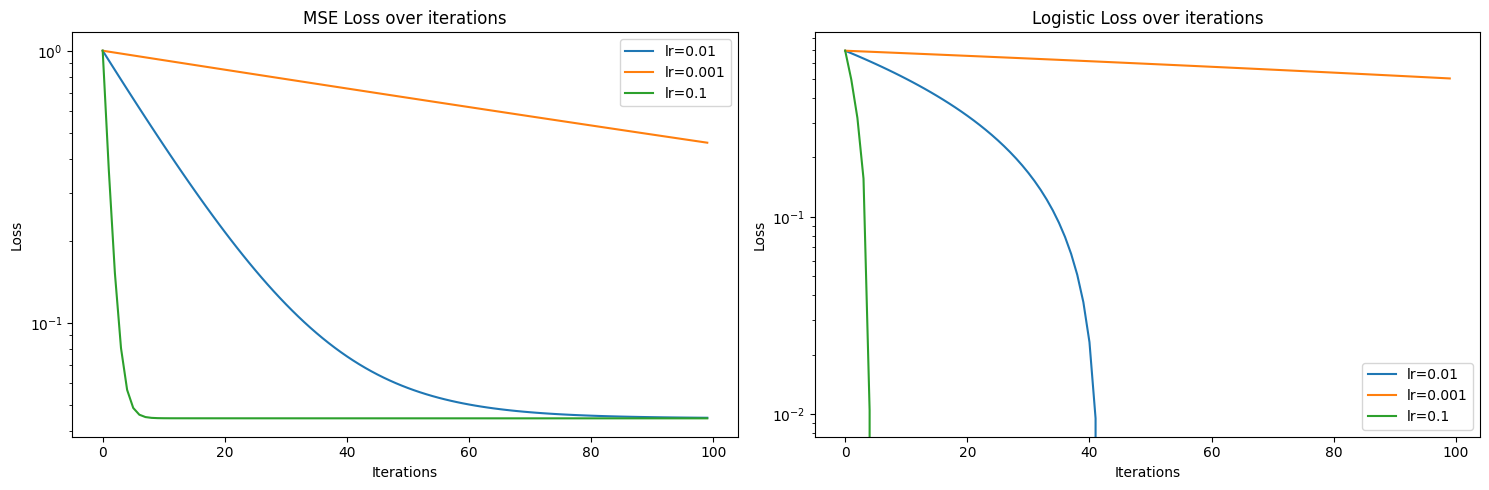

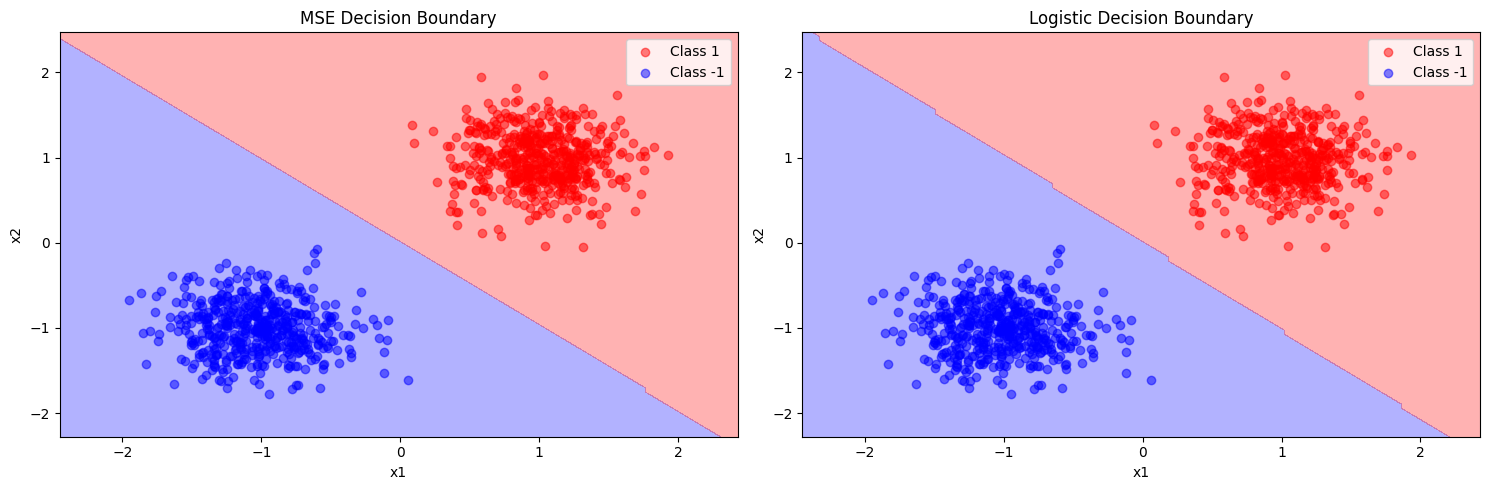

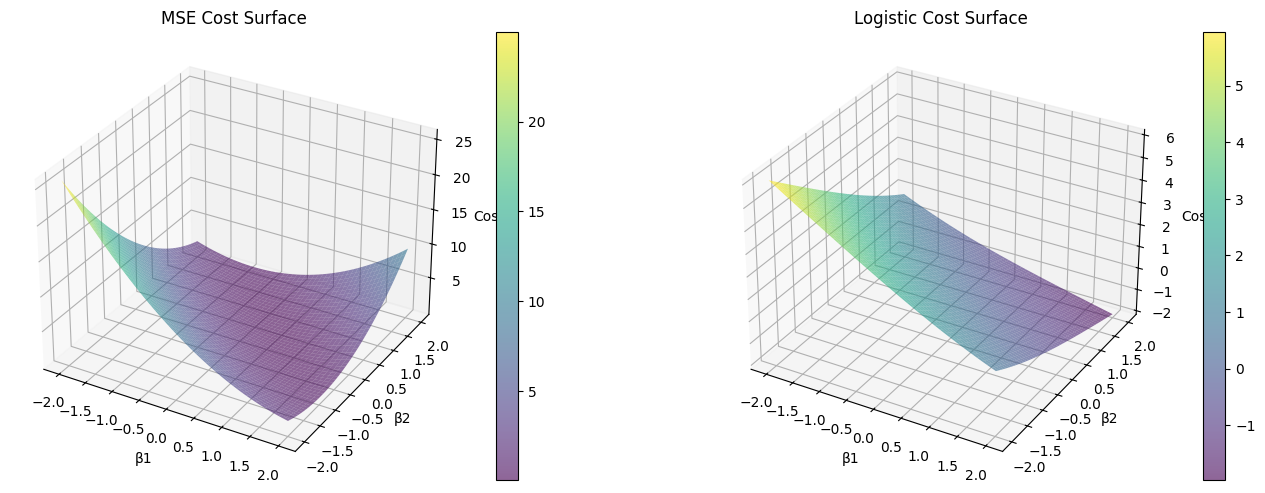

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Test gradient descent on two-gaussian problem
def test_gradient_descent():
    # Generate two-gaussian data (data_type=0)
    datax, datay = generate_artificial_data(num_samples=1000, data_type=0, epsilon=0.02)

    # Initialize parameters for gradient descent
    learning_rates = [0.01, 0.001, 0.1]  # Test different learning rates
    num_iterations = 100

    # Test both MSE and logistic regression
    loss_functions = {
        'MSE': (mean_squared_error, mean_squared_error_gradient),
        'Logistic': (logistic_regression, logistic_regression_gradient)
    }

    plt.figure(figsize=(15, 5))

    # Plot results for each loss function
    for idx, (name, (loss_fn, grad_fn)) in enumerate(loss_functions.items()):
        plt.subplot(1, 2, idx+1)

        for lr in learning_rates:
            # Run gradient descent
            beta = np.zeros((datax.shape[1], 1))  # Initialize beta
            beta_history = []
            loss_history = []

            for i in range(num_iterations):
                loss = loss_fn(beta, datax, datay)
                grad = grad_fn(beta, datax, datay)
                beta = beta - lr * grad

                beta_history.append(beta.copy())
                loss_history.append(loss)

            # Plot loss history
            plt.plot(loss_history, label=f'lr={lr}')

        plt.title(f'{name} Loss over iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.yscale('log')

    plt.tight_layout()
    plt.show()

    # Visualize decision boundaries for best learning rate
    plt.figure(figsize=(15, 5))
    lr = 0.1  # Use moderate learning rate

    for idx, (name, (loss_fn, grad_fn)) in enumerate(loss_functions.items()):
        plt.subplot(1, 2, idx+1)

        # Run gradient descent
        beta = np.zeros((datax.shape[1], 1))
        for i in range(num_iterations):
            grad = grad_fn(beta, datax, datay)
            beta = beta - lr * grad

        # Create decision boundary function
        def decision_fn(X):
            if name == 'MSE':
                return np.sign(np.dot(X, beta))
            else:  # Logistic
                return np.sign(1/(1 + np.exp(-np.dot(X, beta))) - 0.5)

        # Plot decision boundary
        grid, xx, yy = create_2d_grid(datax, step=100)
        zz = decision_fn(grid)
        zz = zz.reshape(xx.shape)

        plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red'])
        plt.scatter(datax[datay.flatten() == 1, 0], datax[datay.flatten() == 1, 1],
                   c='red', label='Class 1', alpha=0.5)
        plt.scatter(datax[datay.flatten() == -1, 0], datax[datay.flatten() == -1, 1],
                   c='blue', label='Class -1', alpha=0.5)

        plt.title(f'{name} Decision Boundary')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Visualize cost function surface
    def plot_cost_surface(loss_fn, beta1_range, beta2_range):
        beta1_grid, beta2_grid = np.meshgrid(beta1_range, beta2_range)
        Z = np.zeros_like(beta1_grid)

        for i in range(len(beta1_range)):
            for j in range(len(beta2_range)):
                beta = np.array([[beta1_grid[i,j]], [beta2_grid[i,j]]])
                Z[i,j] = loss_fn(beta, datax, datay)

        return Z

    # Create range for beta values
    beta_range = np.linspace(-2, 2, 50)

    fig = plt.figure(figsize=(15, 5))

    for idx, (name, (loss_fn, grad_fn)) in enumerate(loss_functions.items()):
        ax = fig.add_subplot(1, 2, idx+1, projection='3d')

        # Calculate cost surface
        beta1_grid, beta2_grid = np.meshgrid(beta_range, beta_range)
        Z = plot_cost_surface(loss_fn, beta_range, beta_range)

        # Plot surface
        surf = ax.plot_surface(beta1_grid, beta2_grid, Z, cmap='viridis', alpha=0.6)

        ax.set_xlabel('β1')
        ax.set_ylabel('β2')
        ax.set_zlabel('Cost')
        ax.set_title(f'{name} Cost Surface')

        plt.colorbar(surf)

    plt.tight_layout()
    plt.show()

# Run the tests
if __name__ == "__main__":
    test_gradient_descent()

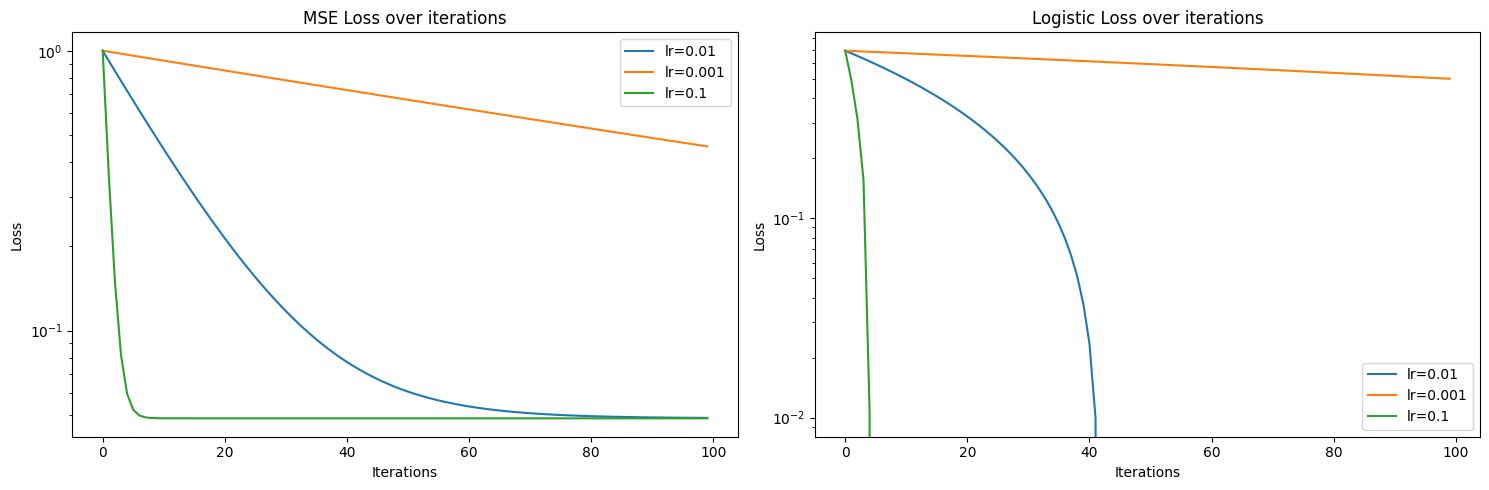

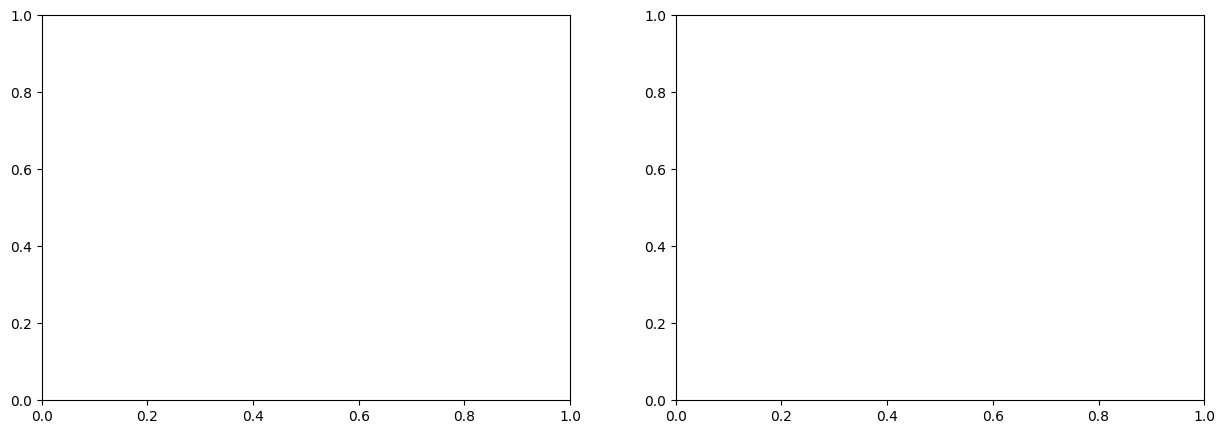

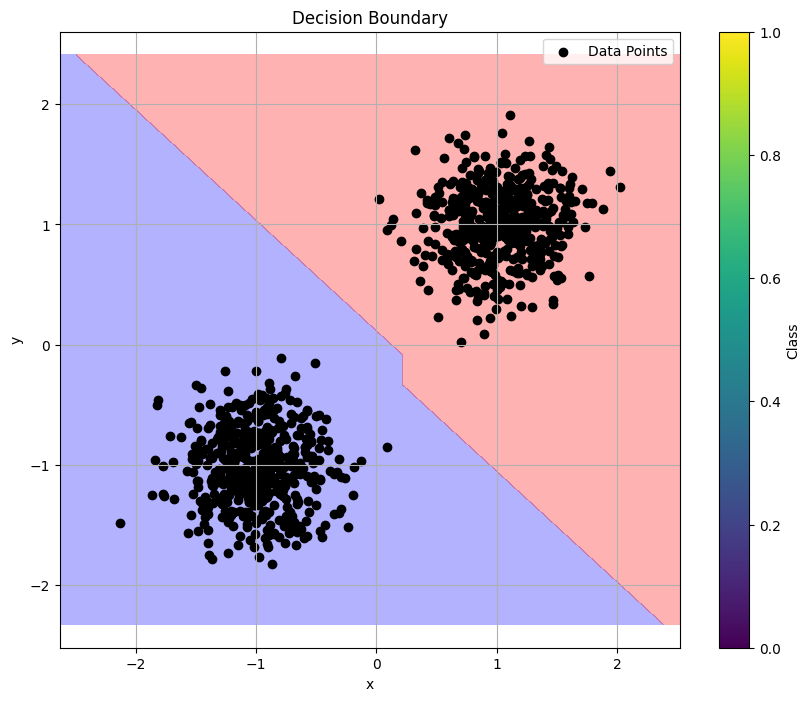

<Figure size 640x480 with 0 Axes>

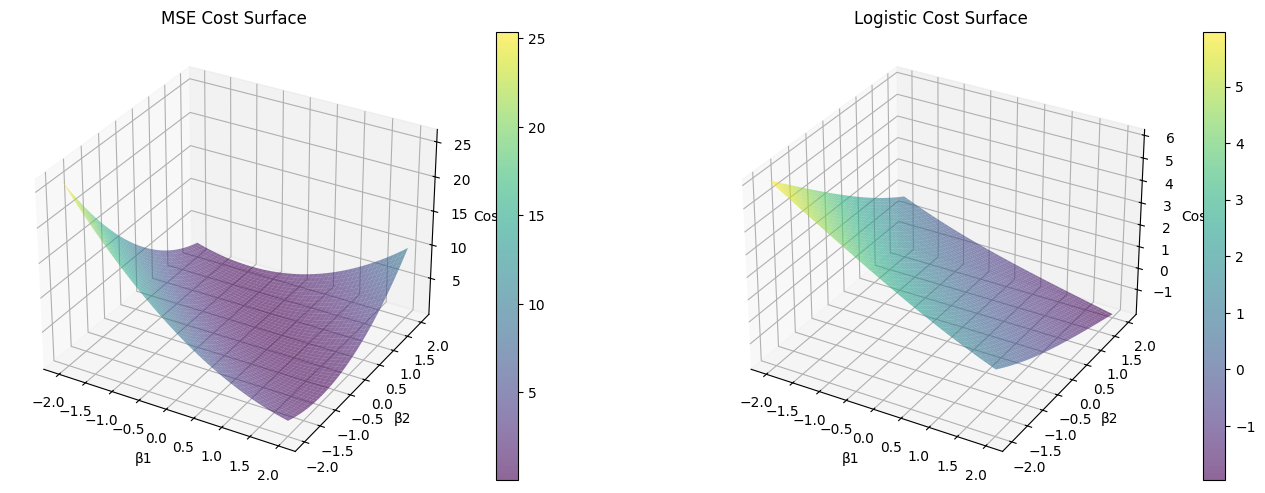

In [21]:
# Test gradient descent on two-gaussian problem
def test_gradient_descent():
    # Generate two-gaussian data (data_type=0)
    datax, datay = generate_artificial_data(num_samples=1000, data_type=0, epsilon=0.02)

    # Initialize parameters for gradient descent
    learning_rates = [0.01, 0.001, 0.1]  # Test different learning rates
    num_iterations = 100

    # Test both MSE and logistic regression
    loss_functions = {
        'MSE': (mean_squared_error, mean_squared_error_gradient),
        'Logistic': (logistic_regression, logistic_regression_gradient)
    }

    plt.figure(figsize=(15, 5))

    # Plot results for each loss function
    for idx, (name, (loss_fn, grad_fn)) in enumerate(loss_functions.items()):
        plt.subplot(1, 2, idx+1)

        for lr in learning_rates:
            # Run gradient descent
            beta = np.zeros((datax.shape[1], 1))  # Initialize beta
            beta_history = []
            loss_history = []

            for i in range(num_iterations):
                loss = loss_fn(beta, datax, datay)
                grad = grad_fn(beta, datax, datay)
                beta = beta - lr * grad

                beta_history.append(beta.copy())
                loss_history.append(loss)

            # Plot loss history
            plt.plot(loss_history, label=f'lr={lr}')

        plt.title(f'{name} Loss over iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.yscale('log')

    plt.tight_layout()
    plt.show()

    # Visualize decision boundaries for best learning rate
    plt.figure(figsize=(15, 5))
    lr = 0.1  # Use moderate learning rate

    for idx, (name, (loss_fn, grad_fn)) in enumerate(loss_functions.items()):
        plt.subplot(1, 2, idx+1)

        # Run gradient descent
        beta = np.zeros((datax.shape[1], 1))
        for i in range(num_iterations):
            grad = grad_fn(beta, datax, datay)
            beta = beta - lr * grad
    def decision_fn(X):
        if name == 'MSE':
             return np.sign(np.dot(X, beta))
        else:  # Logistic
             return np.sign(1/(1 + np.exp(-np.dot(X, beta))) - 0.5)

    plot_decision_boundary(data=datax, fn=decision_fn)

    plt.tight_layout()
    plt.show()

    # Visualize cost function surface
    def plot_cost_surface(loss_fn, beta1_range, beta2_range):
        beta1_grid, beta2_grid = np.meshgrid(beta1_range, beta2_range)
        Z = np.zeros_like(beta1_grid)

        for i in range(len(beta1_range)):
            for j in range(len(beta2_range)):
                beta = np.array([[beta1_grid[i,j]], [beta2_grid[i,j]]])
                Z[i,j] = loss_fn(beta, datax, datay)

        return Z

    # Create range for beta values
    beta_range = np.linspace(-2, 2, 50)

    fig = plt.figure(figsize=(15, 5))

    for idx, (name, (loss_fn, grad_fn)) in enumerate(loss_functions.items()):
        ax = fig.add_subplot(1, 2, idx+1, projection='3d')

        # Calculate cost surface
        beta1_grid, beta2_grid = np.meshgrid(beta_range, beta_range)
        Z = plot_cost_surface(loss_fn, beta_range, beta_range)

        # Plot surface
        surf = ax.plot_surface(beta1_grid, beta2_grid, Z, cmap='viridis', alpha=0.6)

        ax.set_xlabel('β1')
        ax.set_ylabel('β2')
        ax.set_zlabel('Cost')
        ax.set_title(f'{name} Cost Surface')

        plt.colorbar(surf)

    plt.tight_layout()
    plt.show()

# Run the tests
if __name__ == "__main__":
    test_gradient_descent()